In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (32, 16)

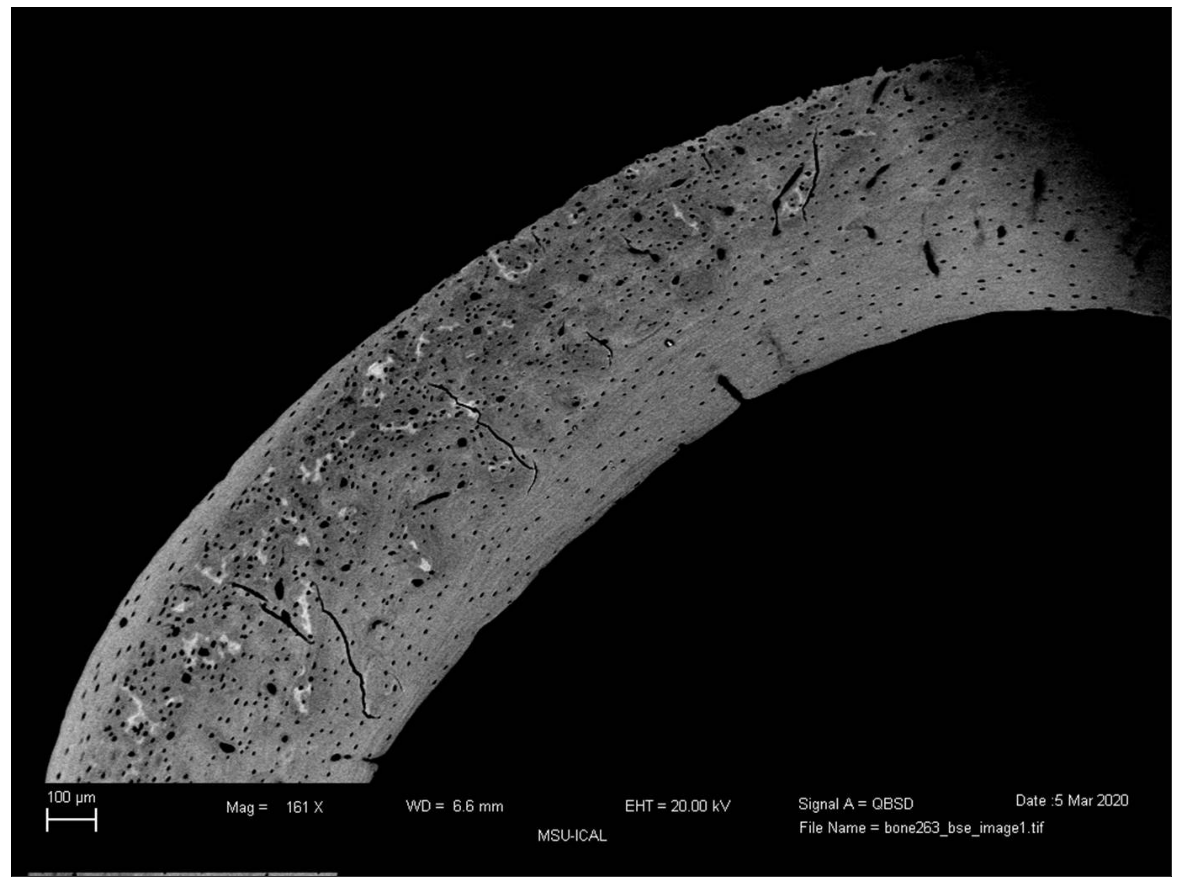

In [2]:
img = cv.imread('images/test.jpg', 0)

plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

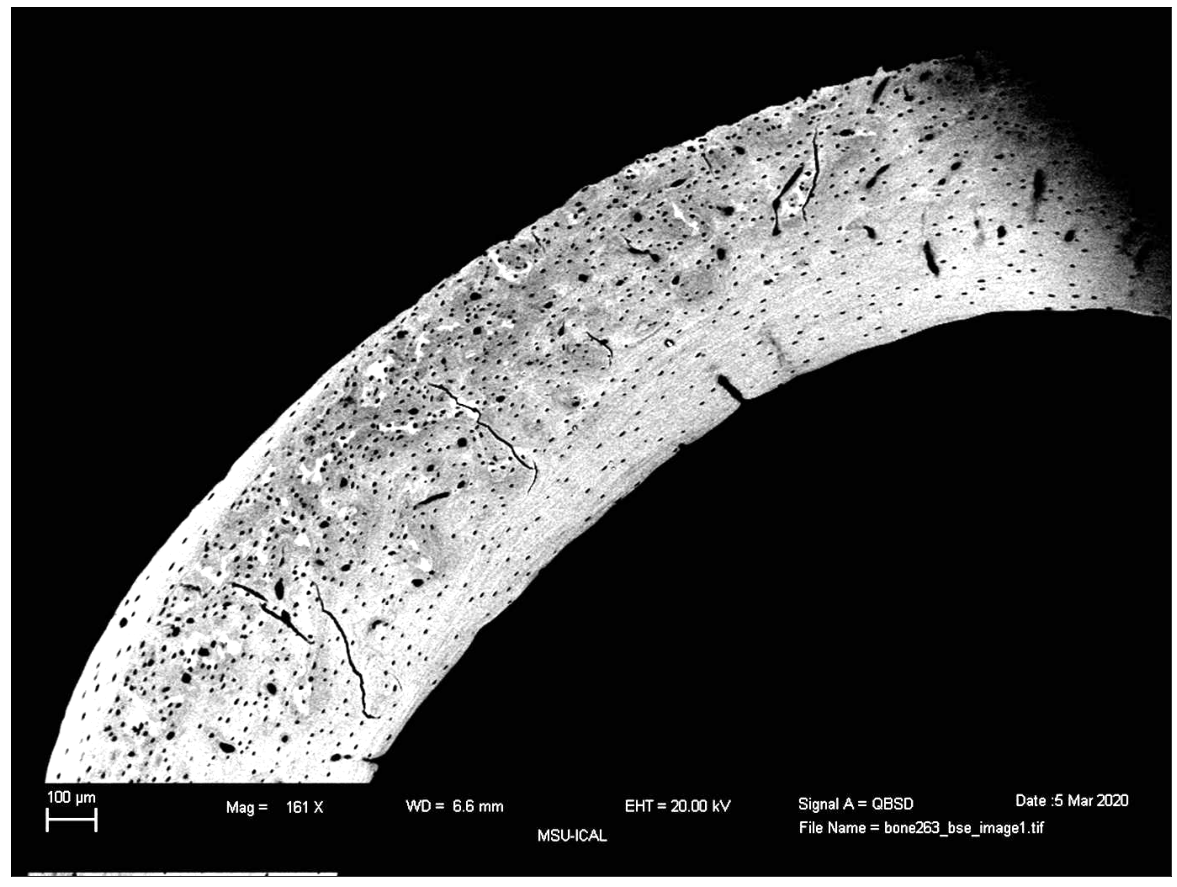

In [38]:
ret,truncd = cv.threshold(img,127,255,cv.THRESH_TRUNC)

plt.imshow(truncd, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

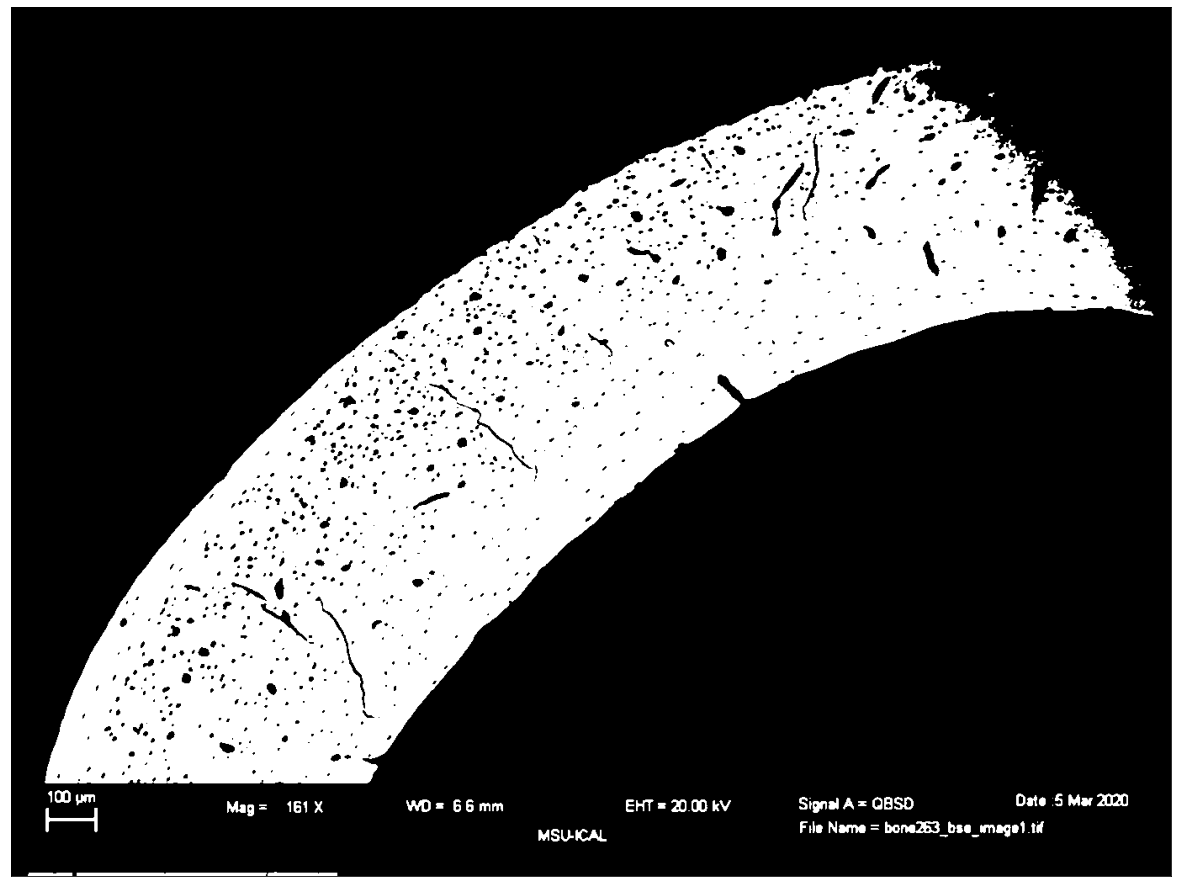

In [39]:
blur = cv.GaussianBlur(truncd,(5,5),0)
ret3,otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.imshow(otsu, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

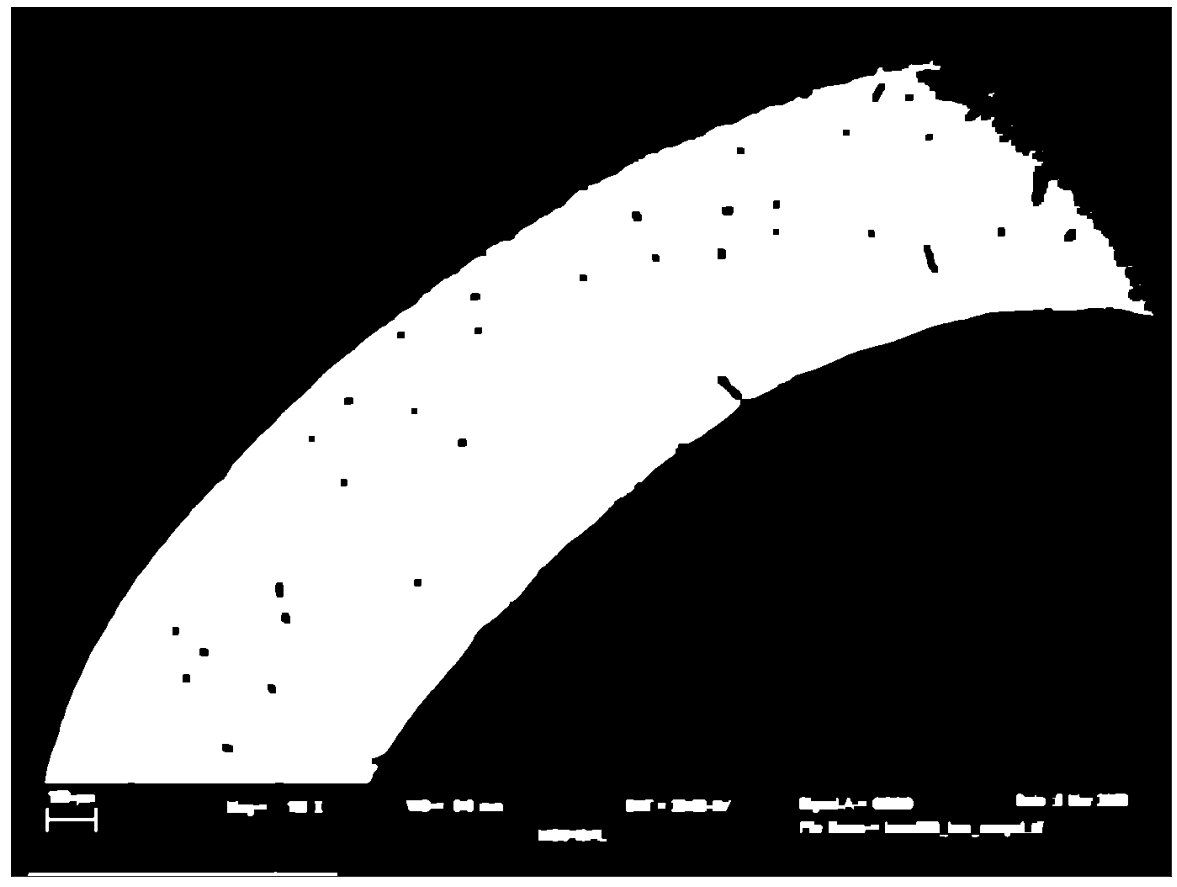

In [40]:
kernel = np.ones((7,7),np.uint8)
closing = cv.morphologyEx(otsu, cv.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [41]:
contours, hierarchy = cv.findContours(closing,
                                      cv.RETR_EXTERNAL,
                                      cv.CHAIN_APPROX_TC89_L1)

areas = [cv.contourArea(c) for c in contours]
max_index = np.argmax(areas)
print(max_index)

33


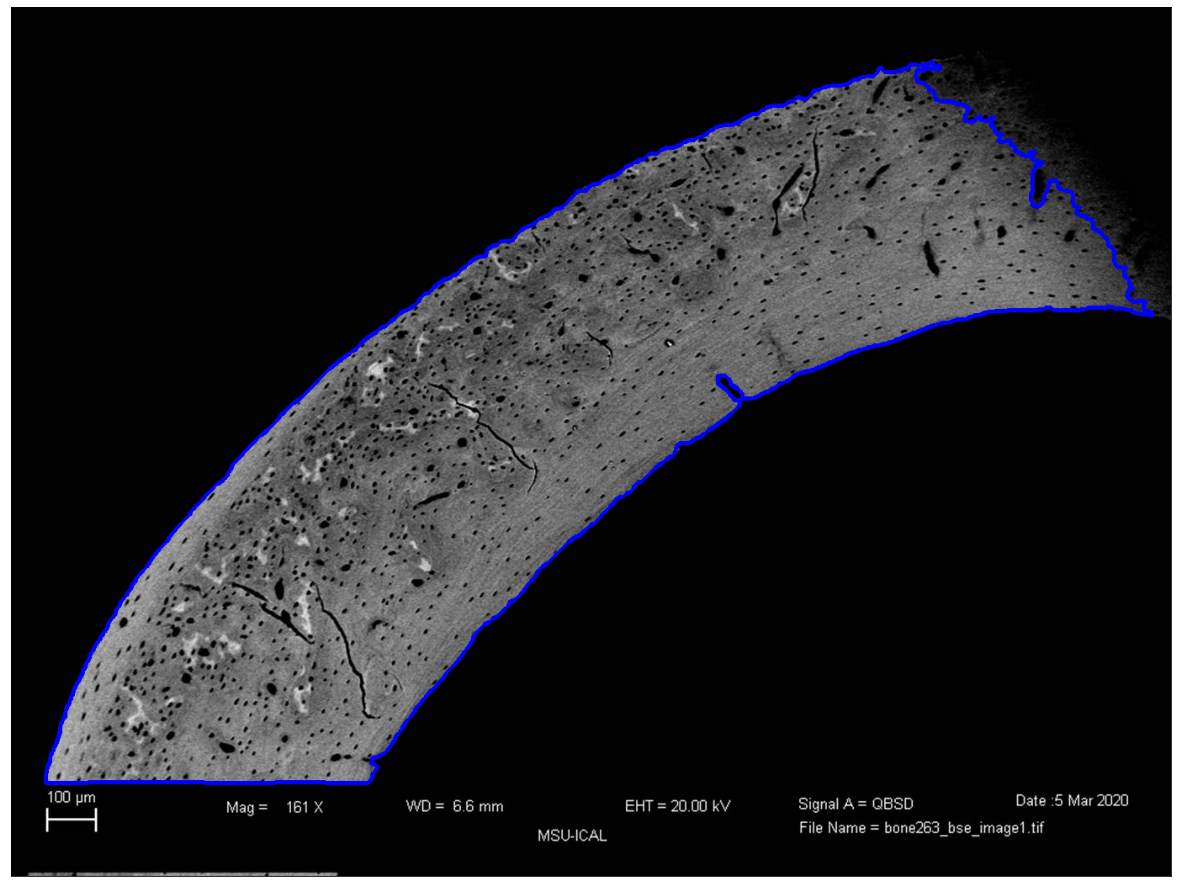

In [42]:
color_img = cv.imread('images/test.jpg')

out = cv.drawContours(color_img, contours, max_index, (0,0,255), 3)
plt.imshow(out)
plt.xticks([]), plt.yticks([])
plt.show()

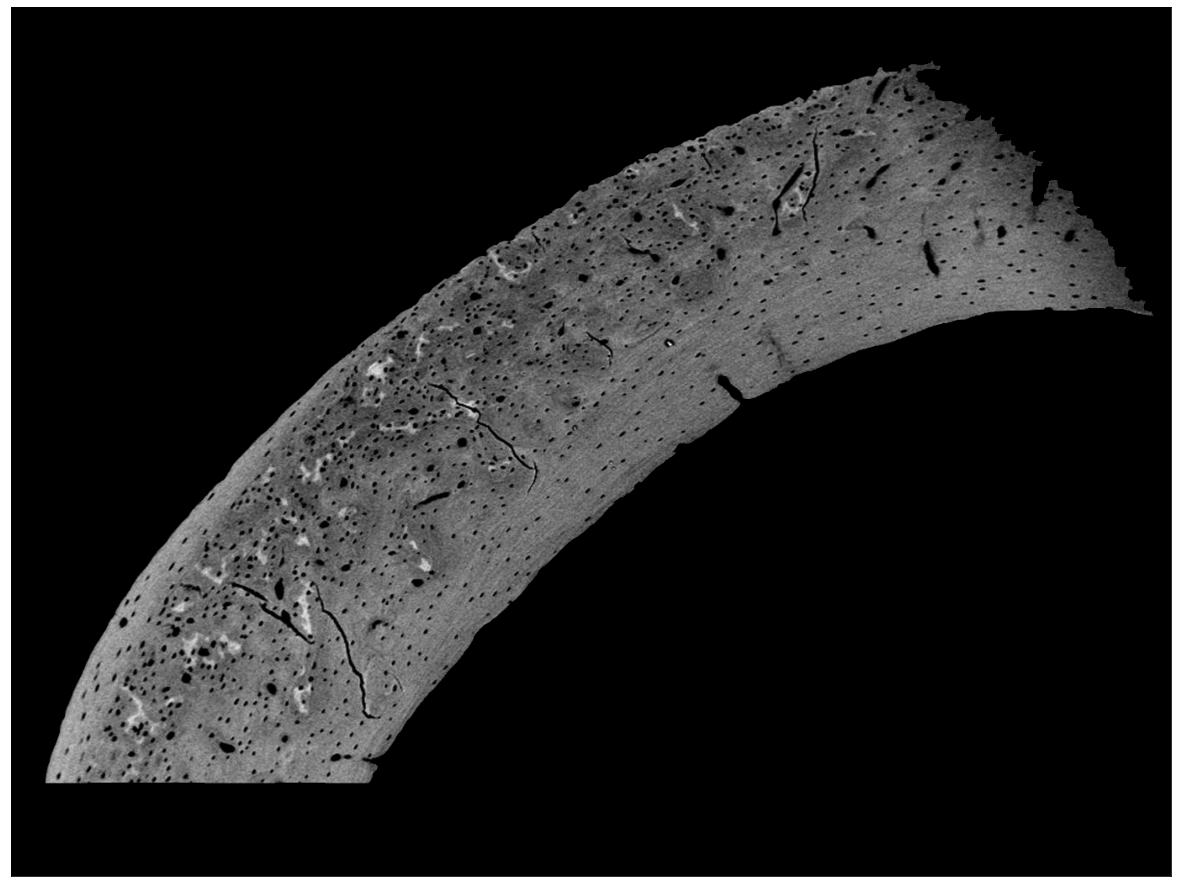

In [43]:
color_img = cv.imread('images/test.jpg')

bone = contours[max_index]

fill_color = [0,0,0]
mask_value = 255

stencil = np.zeros(color_img.shape[:-1]).astype(np.uint8)
cv.fillPoly(stencil, [bone], mask_value)

sel = (stencil != mask_value)
color_img[sel] = fill_color

plt.imshow(color_img)
plt.xticks([]), plt.yticks([])
plt.show()

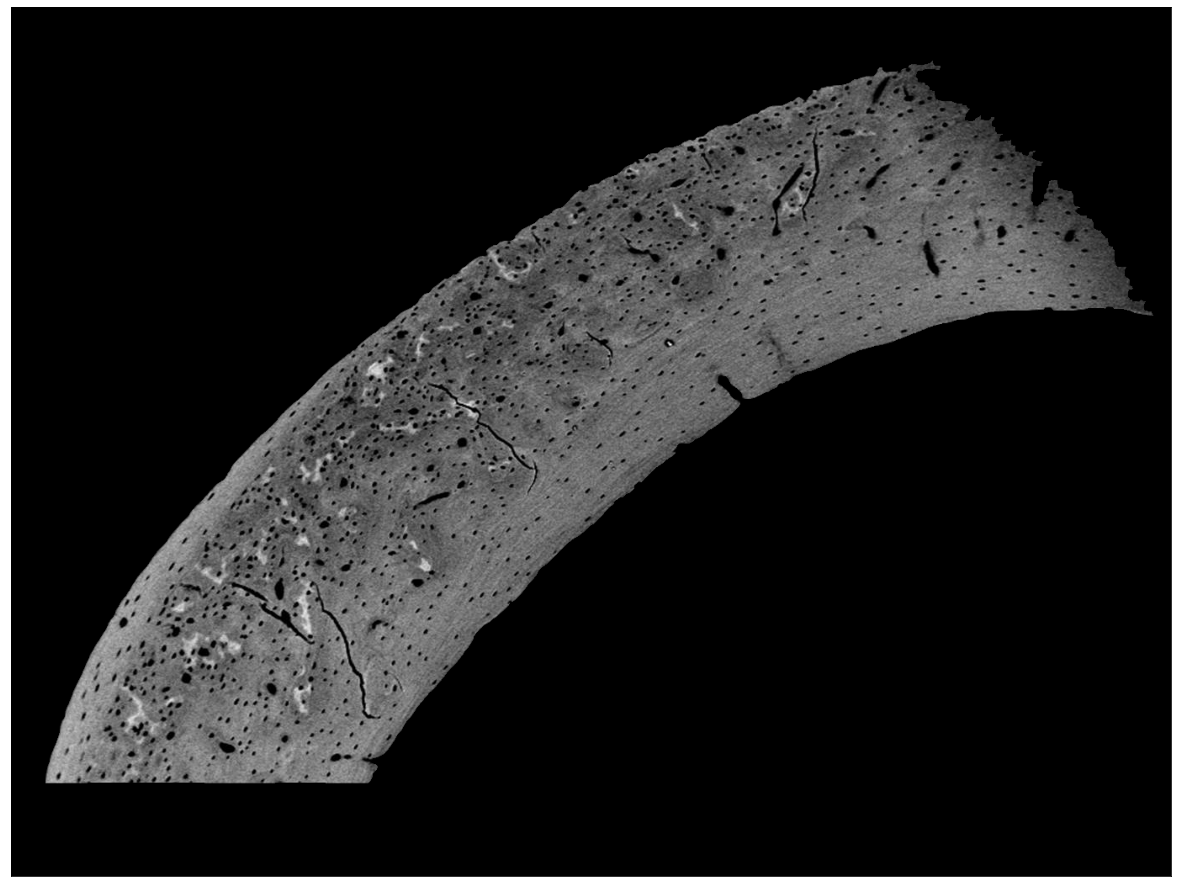

In [44]:
grayscale_filtered = cv.cvtColor(color_img, cv.COLOR_BGR2GRAY)

plt.imshow(grayscale_filtered, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

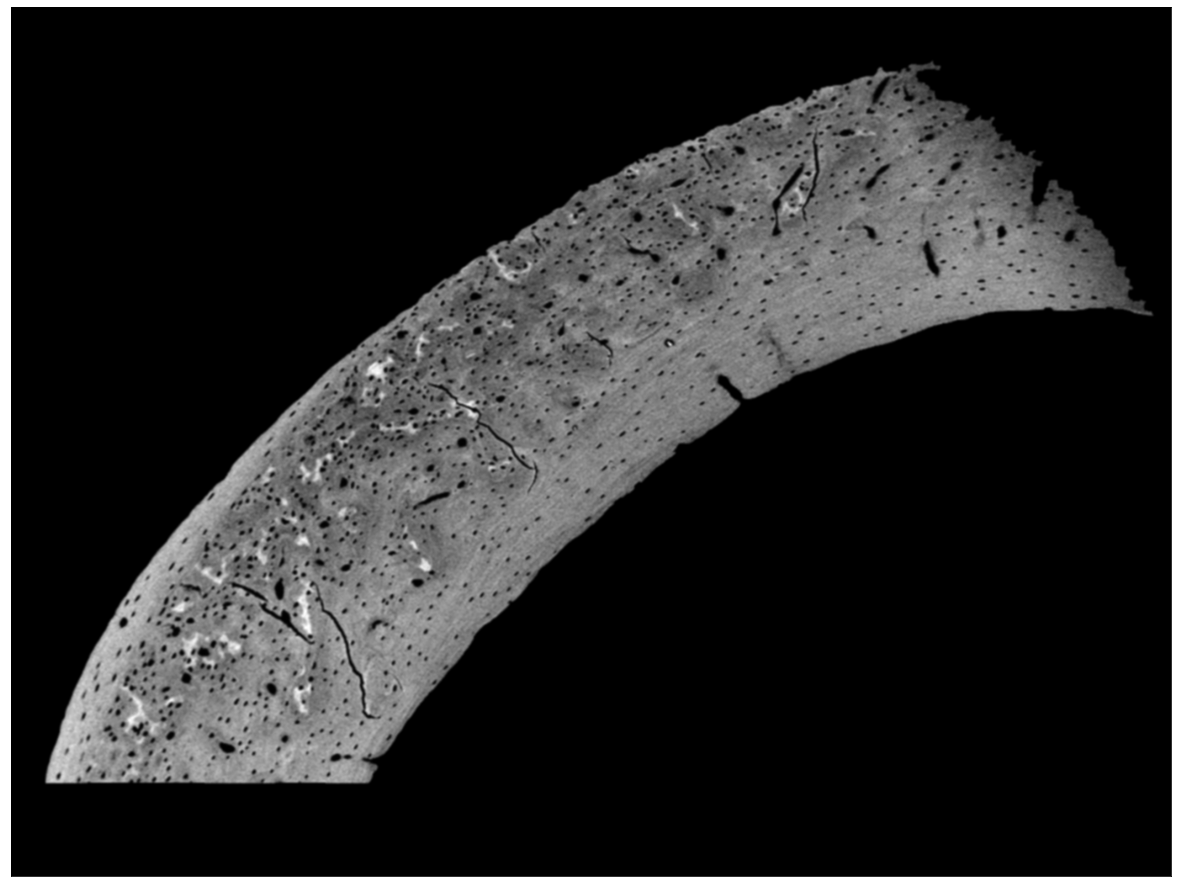

In [112]:
blur = cv.GaussianBlur(grayscale_filtered,(5,5),0)

plt.imshow(blur, 'gray')
plt.xticks([]),plt.yticks([])
plt.show()

639 491


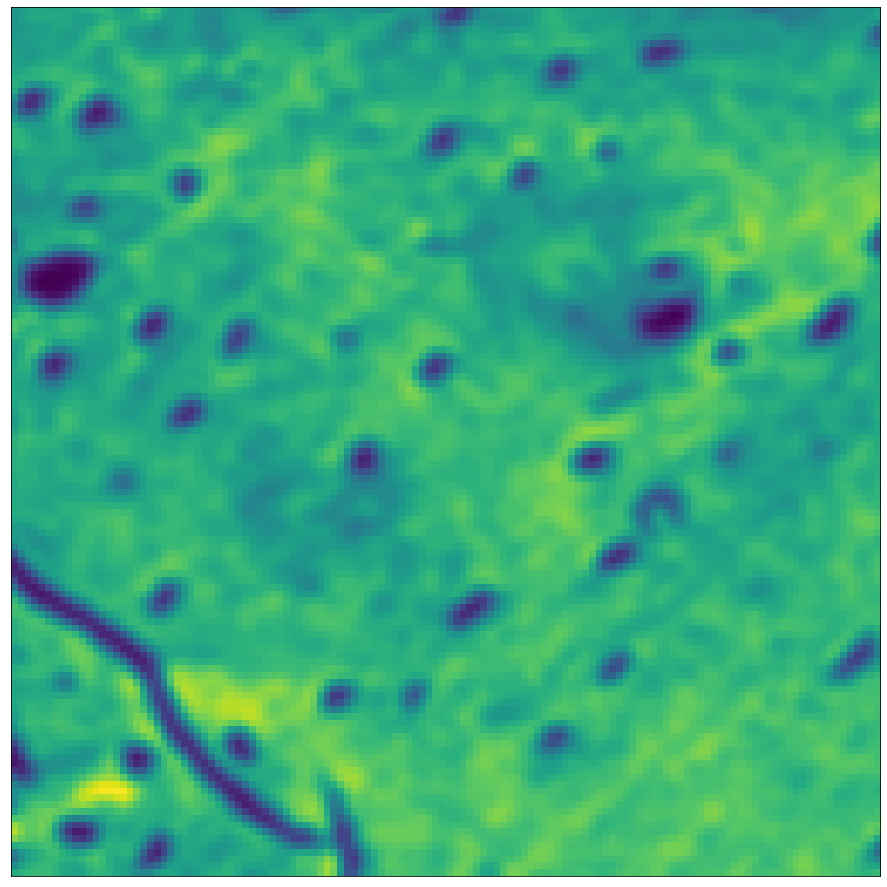

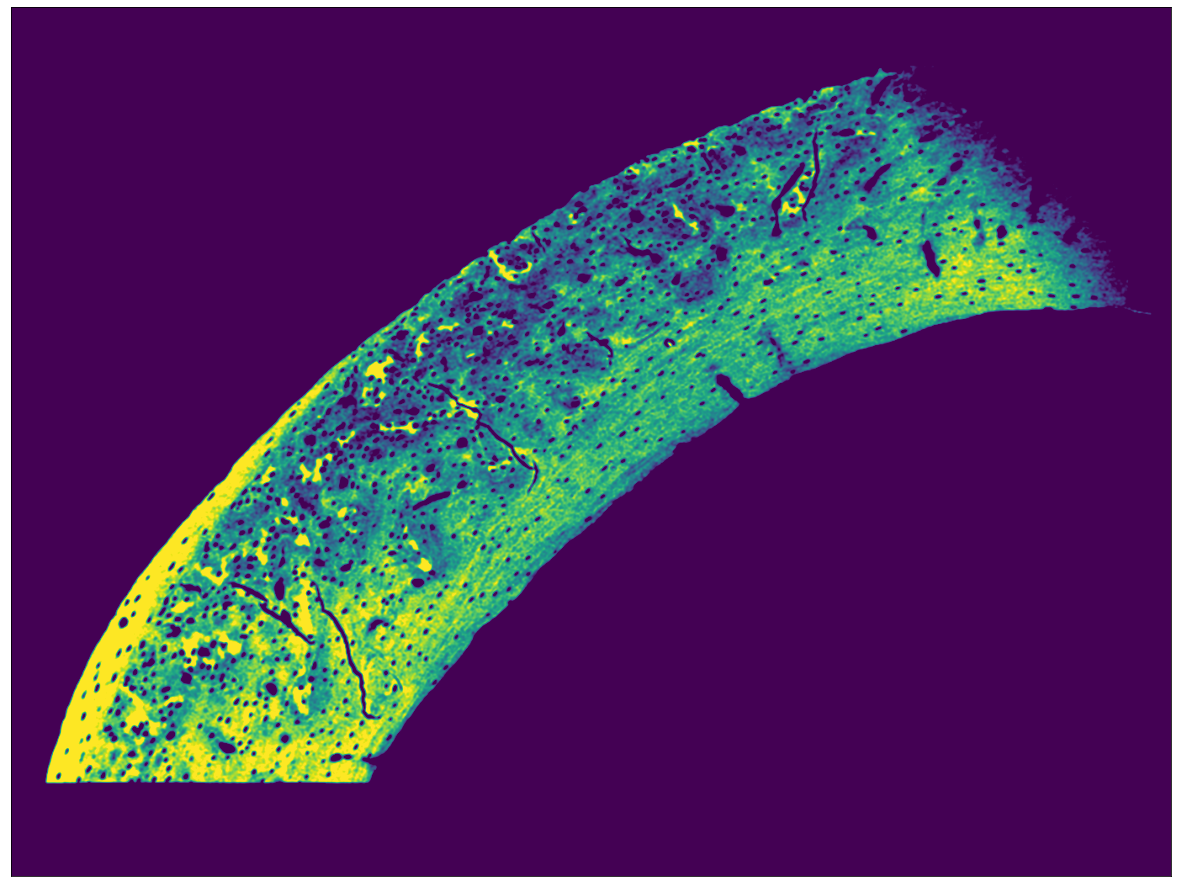

In [124]:
M = cv.moments(bone)
normalized = blur.copy()

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

dx = 64
dy = 64

print(cx, cy)

ROI = normalized[cy-dy:cy+dy, cx-dx:cx+dx]

mean,STD = cv.meanStdDev(ROI)

offset = 1.96
clipped = np.clip(normalized, mean - offset*STD, mean + offset*STD).astype(np.uint8)

result = cv.normalize(clipped, clipped, 0, 255, norm_type=cv.NORM_MINMAX)

plt.imshow(ROI)
plt.xticks([]),plt.yticks([])
plt.show()

plt.imshow(result)
plt.xticks([]),plt.yticks([])
plt.show()

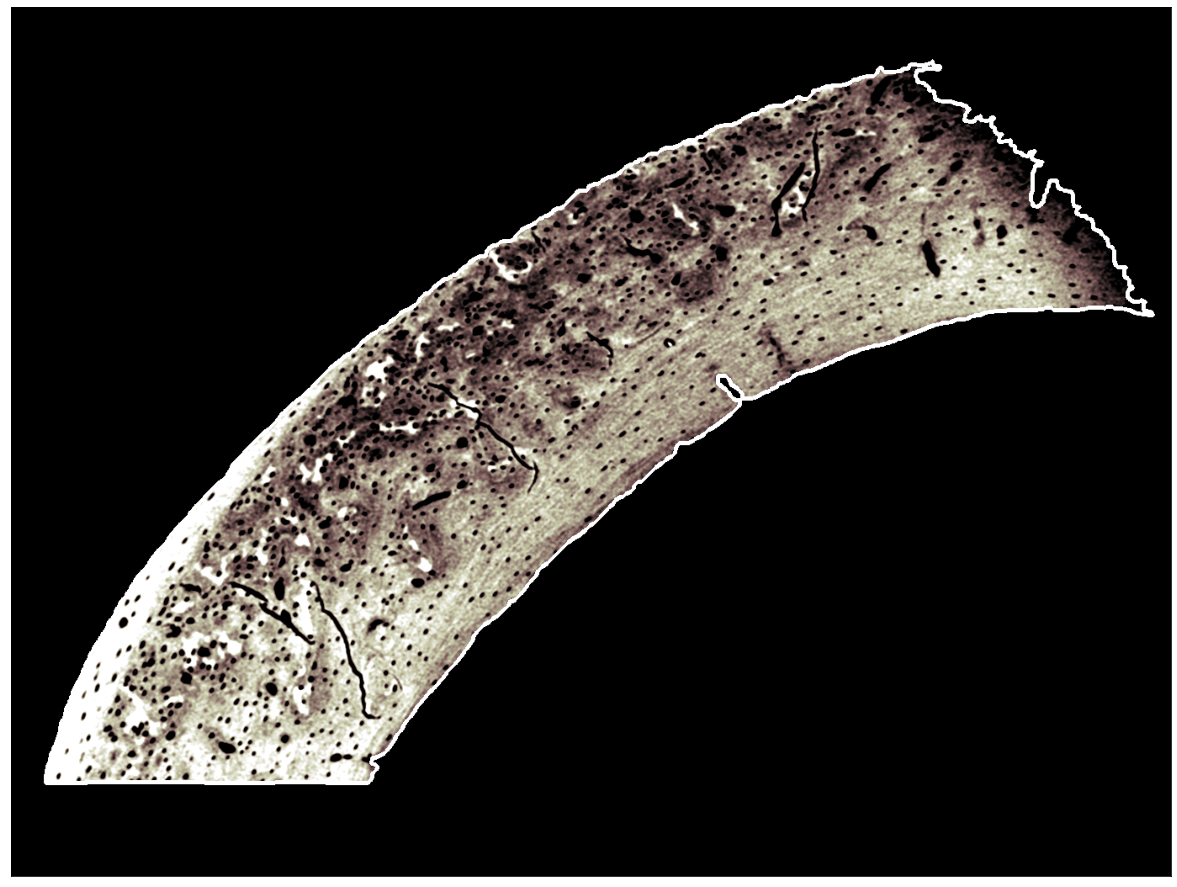

In [130]:
heatmap = cv.applyColorMap(result, cv.COLORMAP_BONE)
out = heatmap.copy()
cv.drawContours(out, [bone], 0, (255,255,255), 3)

plt.imshow(out)
plt.xticks([]),plt.yticks([])
plt.show()

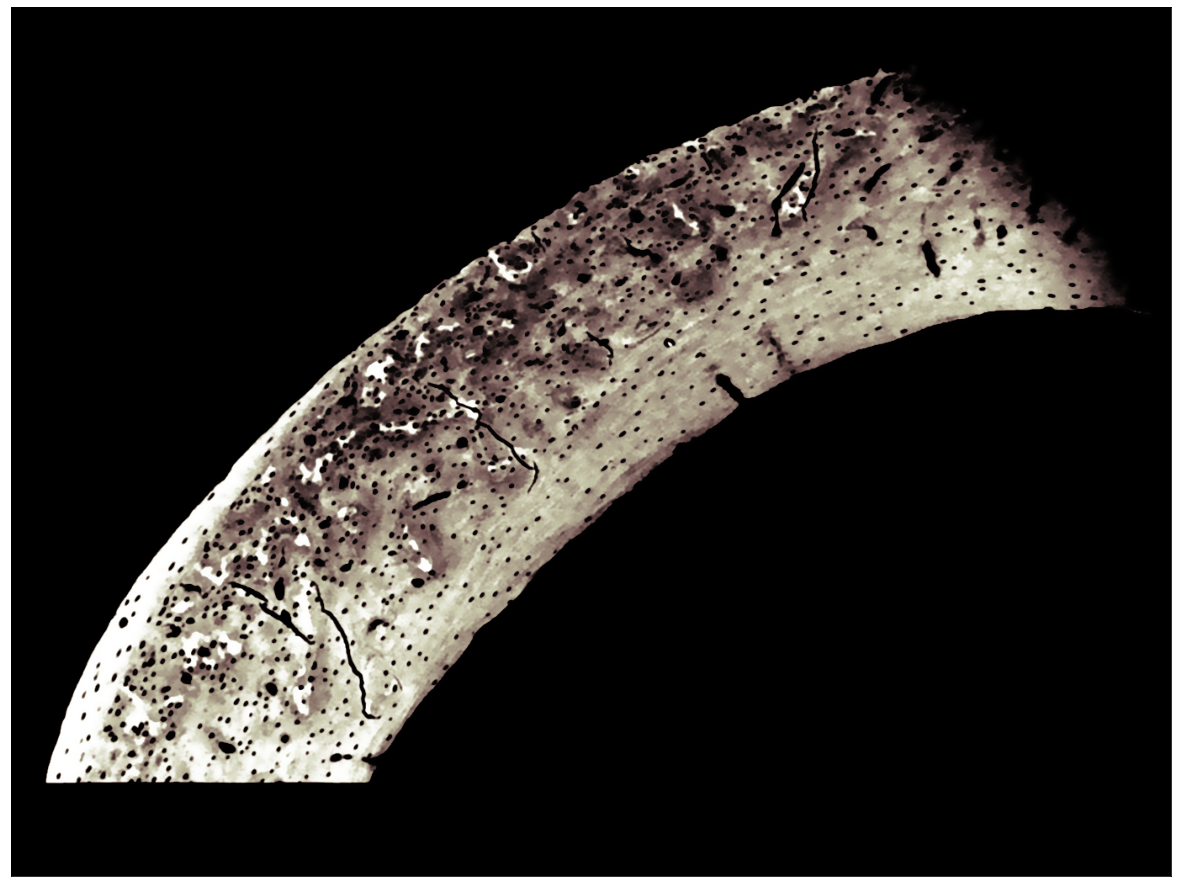

In [140]:
bilatblur = cv.bilateralFilter(heatmap, 13, 75, 75)

plt.imshow(bilatblur)
plt.xticks([]),plt.yticks([])
plt.show()

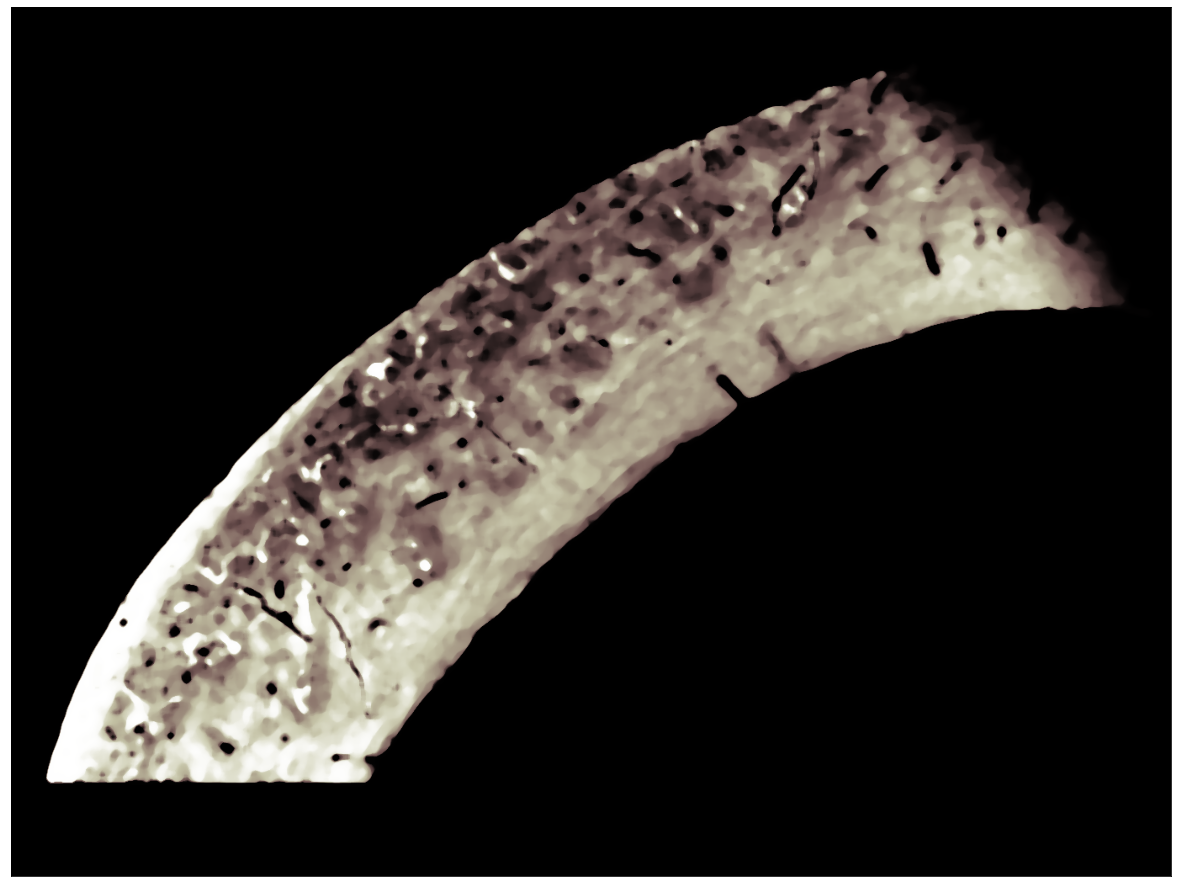

In [142]:
medblur = cv.medianBlur(bilatblur, 11)

plt.imshow(medblur)
plt.xticks([]),plt.yticks([])
plt.show()

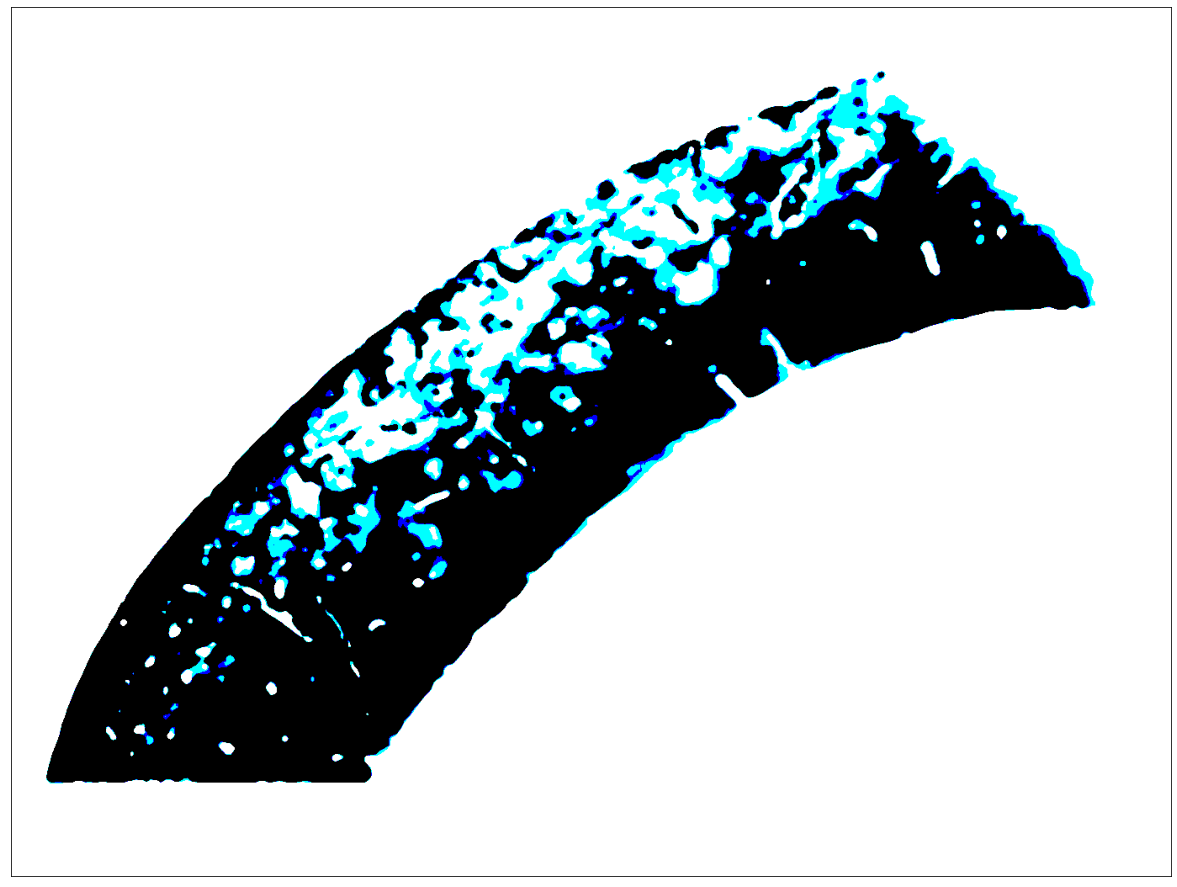

In [167]:
ret,threshold = cv.threshold(medblur, mean, 255, 
                             cv.THRESH_BINARY_INV)

plt.imshow(threshold)
plt.xticks([]),plt.yticks([])
plt.show()